> ** Info** : The Enron fraud is a big, messy and totally fascinating story about corporate malfeasance of nearly every imaginable type.
We’ve combined the email and finance data into a single dataset.
    

In [1]:
#!/usr/bin/python

""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle

enron_data = pickle.load(open("C:/Users/Jon Targaryen/Desktop/mach learn/ud120-projects/final_project/final_project_dataset.pkl", "r"))

> **Info**:  The aggregated Enron email + financial dataset is stored in a dictionary, where each key in the dictionary is a 
person’s name and the value is a dictionary containing all the features of that person.The email + finance (E+F) data dictionary
is stored as a pickle file,which is a handy way to store and load python objects directly. 
Use datasets_questions/explore_enron_data.py to load the dataset.



In [2]:
# How many data points (people) are in the dataset?

print len(enron_data)


146


In [3]:
# For each person, how many features are available?
# features in data set

import pprint
features = {}
for key, value in enron_data.iteritems():
    features[key] = len(value)

pprint.pprint (features)

{'ALLEN PHILLIP K': 21,
 'BADUM JAMES P': 21,
 'BANNANTINE JAMES M': 21,
 'BAXTER JOHN C': 21,
 'BAY FRANKLIN R': 21,
 'BAZELIDES PHILIP J': 21,
 'BECK SALLY W': 21,
 'BELDEN TIMOTHY N': 21,
 'BELFER ROBERT': 21,
 'BERBERIAN DAVID': 21,
 'BERGSIEKER RICHARD P': 21,
 'BHATNAGAR SANJAY': 21,
 'BIBI PHILIPPE A': 21,
 'BLACHMAN JEREMY M': 21,
 'BLAKE JR. NORMAN P': 21,
 'BOWEN JR RAYMOND M': 21,
 'BROWN MICHAEL': 21,
 'BUCHANAN HAROLD G': 21,
 'BUTTS ROBERT H': 21,
 'BUY RICHARD B': 21,
 'CALGER CHRISTOPHER F': 21,
 'CARTER REBECCA C': 21,
 'CAUSEY RICHARD A': 21,
 'CHAN RONNIE': 21,
 'CHRISTODOULOU DIOMEDES': 21,
 'CLINE KENNETH W': 21,
 'COLWELL WESLEY': 21,
 'CORDES WILLIAM R': 21,
 'COX DAVID': 21,
 'CUMBERLAND MICHAEL S': 21,
 'DEFFNER JOSEPH M': 21,
 'DELAINEY DAVID W': 21,
 'DERRICK JR. JAMES V': 21,
 'DETMERING TIMOTHY J': 21,
 'DIETRICH JANET R': 21,
 'DIMICHELE RICHARD G': 21,
 'DODSON KEITH': 21,
 'DONAHUE JR JEFFREY M': 21,
 'DUNCAN JOHN H': 21,
 'DURAN WILLIAM D': 21,
 'ECHOLS

> **Info**:   The “poi” feature records whether the person is a person of interest, according to our definition. 


In [4]:
# How many POIs are there in the E+F dataset?

counter = 0
for i in enron_data.values():
    if i['poi'] == True:
        counter+=1
print " # POI is %d " %counter   

 # POI is 18 


> **Info**: We compiled a list of all POI names (in ../final_project/poi_names.txt) and associated email addresses (in ../final_project/poi_email_addresses.py).


In [5]:
# How many POI’s were there total? 
# (Use the names file, not the email addresses, since many folks have more than one address and a few didn’t work for Enron, 
# so we don’t have their emails.)

poi_name_record = open("C:/Users/Jon Targaryen/Desktop/mach learn/ud120-projects/final_project/poi_names.txt").read().split("\n")

poi_name_total = [record for record in poi_name_record if "(y)" in record or "(n)" in record]

print("Total number of POIs: ", len(poi_name_total))

('Total number of POIs: ', 35)


As you can see, we have many of the POIs in our E+F dataset, but not all of them. Why is that a potential problem?

Main thought is about having enough data to really learn the patterns.  In general, more data is always better--only having 18 data points doesn't give you that many examples to learn from.

In [6]:
# What is the total value of the stock belonging to James Prentice?

enron_data["PRENTICE JAMES"]["total_stock_value"]

1095040

In [7]:
# How many email messages do we have from Wesley Colwell to persons of interest?
enron_data["COLWELL WESLEY"]["from_this_person_to_poi"]


11

In [8]:
# What’s the value of stock options exercised by Jeffrey K Skilling?

enron_data["SKILLING JEFFREY K"]["exercised_stock_options"]

19250000

Some of the schemes the Enron was involved in were : 

-Selling assets to shell companies at the end of each month, and buying them back at the beginning of the next month to hide accounting losses.

-Causing electrical grid failures in California.

-A plan in collaboration with Blockbuster movies to stream movies over the internet.

CEO at that time : Jeffrey Skillings.

Chairman of the Enron board of directors : Ken Lay.

CFO (chief financial officer) of Enron : Andrew Fastow.

In [9]:
# Of these three individuals (Lay, Skilling and Fastow), who took home the most money
# (largest value of “total_payments” feature)?
# How much money did that person get?

mykeys = ["SKILLING JEFFREY K","LAY KENNETH L","FASTOW ANDREW S"]
tot_value =list()
for key, value in enron_data.iteritems():
    if key in mykeys:
        tot_value = tot_value + [key,value["total_payments"]]
print tot_value

['LAY KENNETH L', 103559793, 'FASTOW ANDREW S', 2424083, 'SKILLING JEFFREY K', 8682716]


In [10]:
# How many folks in this dataset have a quantified salary? What about a known email address?

count = 0
for key, value in enron_data.iteritems():
    if value["salary"]!='NaN':
        count += 1
print "people who have a quantified salary: " + str(count)

count1 = 0
for key, value in enron_data.iteritems():
    if value["email_address"]!='NaN':
        count1+= 1
print "people who have an email address: " + str(count1)


people who have a quantified salary: 95
people who have an email address: 111


95 have a quantified salary. 111 have a known email address.

> **INFO**: A python dictionary can’t be read directly into an sklearn classification or regression algorithm; instead, it needs a numpy array or a list of lists (each element of the list (itself a list) is a data point, and the elements of the smaller list are the features of that point).
We’ve written some helper functions (featureFormat() and targetFeatureSplit() in tools/feature_format.py) that can take a list of feature names and the data dictionary, and return a numpy array.
In the case when a feature does not have a value for a particular person, this function will also replace the feature value with 0 (zero).

As you saw a little while ago, not every POI has an entry in the dataset (e.g. Michael Krautz). That’s because the dataset was created using the financial data you can find in final_project/enron61702insiderpay.pdf, which is missing some POI’s (those absences propagated through to the final dataset). On the other hand, for many of these “missing” POI’s, we do have emails.

While it would be straightforward to add these POI’s and their email information to the E+F dataset, and just put “NaN” for their financial information, this could introduce a subtle problem. I will walk through that here.


In [11]:
# How many people in the E+F dataset (as it currently exists) have “NaN” for their total payments? 
# What percentage of people in the dataset as a whole is this?

count2 = 0
for key, value in enron_data.iteritems():
    if value["total_payments"]=='NaN':
        count2 += 1
print "people in set with no number of their payments: " + str(count2)

print "percentage of people in the set with payment value missing: " + str(float(count2)/len(enron_data)*100)

people in set with no number of their payments: 21
percentage of people in the set with payment value missing: 14.3835616438


 21 out of 146 (about 14%) of the people in the dataset don't have "total_payments" filled in.

In [12]:
# How many POIs in the E+F dataset have “NaN” for their total payments? 
# What percentage of POI’s as a whole is this?


# number of pois

counter = 0
for i in enron_data.values():
    if i['poi'] == True:
        counter+=1
print "POI is %d " %counter  


# pois with 'NaN' payments
count3 = 0
for key, value in enron_data.iteritems():
    if value["poi"]=='True':
        if value["total_payments"]=='NaN':
            count3 += 1
print "POI people in set with no number of their payments: " + str(count3)

print "Percentage of POI people in the set with payment value missing: " + str(float(count3)/len(enron_data)*100)

POI is 18 
POI people in set with no number of their payments: 0
Percentage of POI people in the set with payment value missing: 0.0


0 out of 18, or 0% of POI's don't have total_payments filled.

If a machine learning algorithm were to use "total_payments" as a feature, 
would you expect it to associate a “NaN” value with POIs or non-POIs?

No training points would have "NaN" for total_payments when the class label is "POI".
The "NaN" would be associated with non-POIs.

If you added in, say, 10 more data points which were all POI’s, and put “NaN” for the total payments for those folks, 
the numbers you just calculated would change.
What is the new number of people of the dataset? What is the new number of folks with “NaN” for total payments?


New number of people of the dataset = 146 + 10 = 156.

People in set with no number of their payments =  21 + 10 = 31.


Now there are 156 folks in dataset, 31 of whom have "NaN" total_payments. 

This makes for 31/156 = 19.87 % of them with a "NaN" overall.


What is the new number of POI’s in the dataset? What is the new number of POI’s with NaN for total_payments?

New number of POI's in the data set = 18 + 10 = 28.

New number of POI’s with NaN for total_payments = 0 + 10 = 10.

POI + 'NaN' payment values = 10/28 = 35.71 % .


That's 36% of the POI's who have "NaN" for total_payments, a big jump from before.

Once the new data points are added, do you think a supervised classification algorithm might interpret “NaN” for total_payments as a clue that someone is a POI?

Yes, it totally could.


Adding in the new POI’s in this example, none of whom we have financial information for, has introduced a subtle problem, that our lack of financial information about them can be picked up by an algorithm as a clue that they’re POIs. Another way to think about this is that there’s now a difference in how we generated the data for our two classes--non-POIs all come from the financial spreadsheet, while many POIs get added in by hand afterwards. That difference can trick us into thinking we have better performance than we do--suppose you use your POI detector to decide whether a new, unseen person is a POI, and that person isn’t on the spreadsheet. Then all their financial data would contain “NaN” but the person is very likely not a POI (there are many more non-POIs than POIs in the world, and even at Enron)--you’d be likely to accidentally identify them as a POI, though!

For now, the takeaway message is to be very careful about introducing features that come from different sources depending on the class! It’s a classic way to accidentally introduce biases and mistakes.

> **INFO**:  Run the starter code found in regression/finance_regression.py. This will draw a scatterplot, with all the data points drawn in. What target are you trying to predict? What is the input feature being used to predict it?
Mentally (or better yet, print out the scatterplot and use paper and pencil) sketch out the regression line that you roughly predict.

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


reg slope [ 5.44814029]
reg intercept -102360.543294


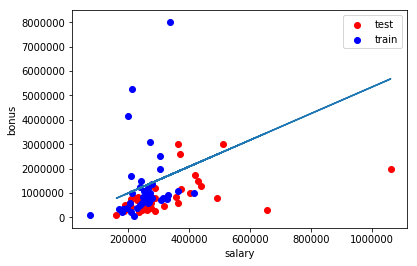

In [13]:
# slope and intercept with regression

#!/usr/bin/python

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).
    Draws a little scatterplot of the training/testing data
    You fill in the regression code where indicated:
"""    


import sys
import pickle
sys.path.append("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\tools")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\final_project\\final_project_dataset_modified.pkl", "r") )


### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.



from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(feature_train,target_train)
reg

print "reg slope " + str(reg.coef_)
print "reg intercept " + str(reg.intercept_)





### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

The regression target is 'bonus.'
The input being used to find the regression target is 'salary.'

Training is the 'blue' dots.
Testing is the 'red' dots.

Regression line is drawn.

The regression line coefficient is : 5.44

The regression line y-intercept is : -102360.54 

In [14]:
# regression score on train : 

print "score on train data: " + str(reg.score(feature_train,target_train))

# regression score on test :

print "score on test data: " + str(reg.score(feature_test,target_test))


score on train data: 0.0455091926995
score on test data: -1.48499241737


This is a very bad score on test data.

There are lots of finance features available, some of which might be more powerful than others in terms of predicting a person’s bonus. For example, suppose you thought about the data a bit and guess that the “long_term_incentive” feature, which is supposed to reward employees for contributing to the long-term health of the company, might be more closely related to a person’s bonus than their salary is.

A way to confirm that you’re right in this hypothesis is to regress the bonus against the long term incentive, and see if the regression score is significantly higher than regressing the bonus against the salary. Perform the regression of bonus against long term incentive--what’s the score on the test data?

In [15]:
# bonus against long term incentive

import sys
import pickle
sys.path.append("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\tools")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\final_project\\final_project_dataset_modified.pkl", "r") )


### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(feature_train,target_train)
# reg

# print "reg coeff " + str(reg.coef_)
# print "reg intercept " + str(reg.intercept_)

print "score on test data " + str(reg.score(feature_test,target_test))


score on test data -0.59271289995


If you had to predict someone’s bonus and you could only have one piece of information about them, would you rather know their salary or the long term incentive that they received?

We have a better score when using long-term incentive to predict someone's bonus, which translates to a better fit.

> **INFO**: Go back to a setup where you are using the salary to predict the bonus, and rerun the code to remind yourself of what the data look like. You might notice a few data points that fall outside the main trend, someone who gets a high salary (over a million dollars!) but a relatively small bonus. This is an example of an outlier, and we’ll spend lots of time on them in the next lesson.
A point like this can have a big effect on a regression: if it falls in the training set, it can have a significant effect on the slope/intercept if it falls in the test set, it can make the score much lower than it would otherwise be As things stand right now, this point falls into the test set (and probably hurting the score on our test data as a result). Let’s add a little hack to see what happens if it falls in the training set instead. Add these two lines near the bottom of finance_regression.py, right before plt.xlabel(features_list[1]):

reg.fit(feature_test, target_test)

plt.plot(feature_train, reg.predict(feature_train), color="b") 

reg slope of new line:  [ 2.27410114]


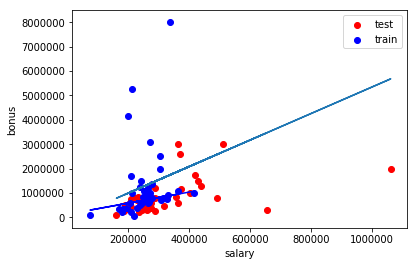

In [16]:
# OUTLIER

import sys
import pickle
sys.path.append("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\tools")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\final_project\\final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.


from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(feature_train,target_train)
reg

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass


reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b") 

print "reg slope of new line:  " + str(reg.coef_)


plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

Now we’ll be drawing two regression lines, one fit on the test data (with outlier) and one fit on the training data (no outlier). Look at the plot now--big difference, huh? That single outlier is driving most of the difference. 

What’s the slope of the new regression line?

The slope is about 2.27 after removing the outlier, which is a big difference from what we had before (about 5.4).  A small number of outliers makes a big difference!



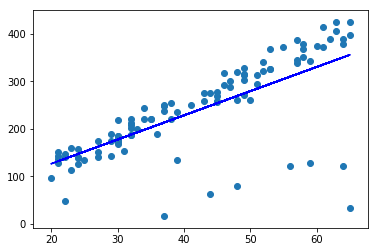

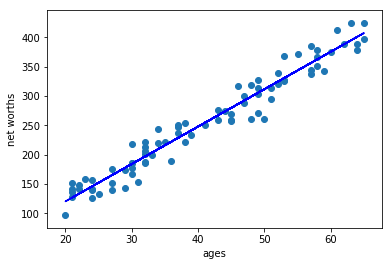

In [19]:
# regression with outliers

#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

import sys
import pickle
sys.path.append("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\outliers")

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\outliers\\practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\outliers\\practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like


from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(ages_train,net_worths_train)
reg

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

In [20]:
# regression slope with outliers

print "reg slope : " + str(reg.coef_)

# regression score with outliers
print "score on test data " + str(reg.score(ages_test,net_worths_test))


reg slope : [[ 6.36859481]]
score on test data 0.983189455396


> **INFO**: In outliers/outlier_cleaner.py, you will find the skeleton for a function called outlierCleaner() that you will fill in with a cleaning algorithm. It takes three arguments: predictions is a list of predicted targets that come from your regression, ages is the list of ages in the training set, and net_worths is the actual value of the net worths in the training set. There should be 90 elements in each of these lists (because the training set has 90 points in it). Your job is to return a list called cleaned_data that has only 81 elements in it, which are the 81 training points where the predictions and the actual values (net_worths) have the smallest errors (90 * 0.9 = 81). The format of cleaned_data should be a list of tuples, where each tuple has the form (age, net_worth, error). 



reg slope with outliers: [[ 5.07793064]]
reg score with outliers: 0.878262470366


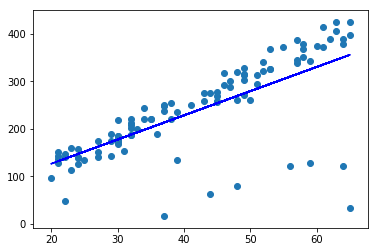

length of cleaned data: 81
reg slope without outliers: [[ 6.36859481]]
reg score without outliers: 0.983189455396


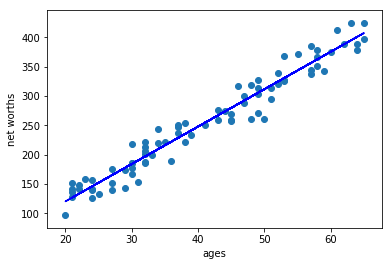

In [21]:
#!/usr/bin/python

# regression metrics with and without outliers

import random
import numpy
import matplotlib.pyplot as plt
import pickle

import sys
import pickle
sys.path.append("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\outliers")

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\outliers\\practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\outliers\\practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like


from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(ages_train,net_worths_train)
reg
    
print "reg slope with outliers: " +str(reg.coef_)
print "reg score with outliers: " +str(reg.score(ages_test,net_worths_test))


try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


## outlier cleaner function

def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    
    cleaned_data = []

    ### your code goes here
    errors= (net_worths-predictions)**2
    
    cleaned_data=zip(ages,net_worths,errors)
    
    cleaned_data=sorted(cleaned_data,key=lambda errors:errors[2][0],reverse=True)
          
    cleaned_data=cleaned_data[int(len(net_worths)*0.1):]

    
    return cleaned_data

### identify and remove the most outlier-y points

cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
    
    print "length of cleaned data: " +str(len(cleaned_data))
    
    
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

### only run this code if cleaned_data is returning data

if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        print "reg slope without outliers: " +str(reg.coef_)
        print "reg score without outliers: " +str(reg.score(ages_test,net_worths_test)) 
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

> **INFO** : In the mini-project for the regressions lesson, regression was used to predict the bonuses for Enron employees. As you saw, even a single outlier can make a big difference on the regression result. The dataset in use in that project had already been cleaned of some significant outliers. Identifying and cleaning away outliers is something to always think about when looking at a dataset for the first time.
You can find the starter code in outliers/enron_outliers.py, which reads in the data (in dictionary form) and converts it into a sklearn-ready numpy array. Since there are two features being extracted from the dictionary (“salary” and “bonus”), the resulting numpy array will be of dimension N x 2, where N is the number of data points and 2 is the number of features. This is perfect input for a scatterplot; we’ll use the matplotlib.pyplot module to make that plot. (We’ve been using pyplot for all the visualizations in this course.) Add these lines to the bottom of the script to make your scatterplot:


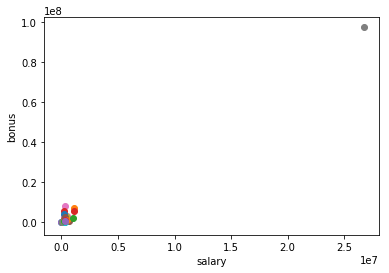

In [22]:
#!/usr/bin/python

# Enron outliers with bonus and salary

import pickle
import sys
import matplotlib.pyplot
sys.path.append("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\tools\\")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\final_project\\final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below


for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()


There’s one outlier that should pop out to you immediately. Now the question is to identify the source. We found the original data source to be very helpful for this identification; you can find that PDF in final_project/enron61702insiderpay.pdf 
What’s the name of the dictionary key of this data point? (e.g. if this is Ken Lay, the answer would be “LAY KENNETH L”).

What's the dictionary key of the biggest Enron outlier from the file?

TOTAL

Does this outlier seem like a data point that we should include when running machine learning on this dataset? Or should we remove it?

We should take it out .
Its a spreadsheet quirk.
Yes, the spreadsheet added up all the data points for us, and we need to take that "point" out.

> **INFO**: A quick way to remove a key-value pair from a dictionary is the following line: dictionary.pop( key, 0 ) Write a line like this (you’ll have to modify the dictionary and key names, of course) and remove the outlier before calling featureFormat(). Now rerun the code, so your scatterplot doesn’t have this outlier anymore. Are all the outliers gone?

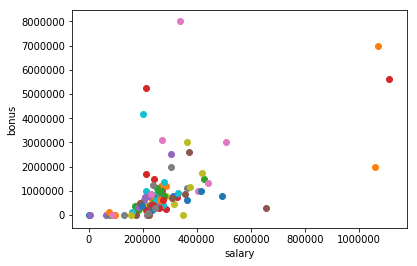

In [23]:
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\tools\\")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\final_project\\final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]

data_dict.pop('TOTAL', 0) 
data = featureFormat(data_dict, features)


### your code below


for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()




We see 4 more outliers, although none that are as waaaayyy out there as the last example (the "total" line)

We would argue that there’s 4 more outliers to investigate; let's look at a couple of them. Two people made bonuses of at least 5 million dollars, and a salary of over 1 million dollars; in other words, they made out like bandits. What are the names associated with those points?

In [24]:
for i in data_dict:
    if data_dict[i]["salary"]>1000000 and data_dict[i]["salary"]!='NaN' and data_dict[i]["bonus"]>5000000 and data_dict[i]["bonus"]!='NaN':
        print i

LAY KENNETH L
SKILLING JEFFREY K


Would you guess that these are typos or weird spreadsheet lines that we should remove, or that there’s a meaningful reason why these points are different? (In other words, should they be removed before we, say, try to build a POI identifier?)

Yes! They're two of Enron's biggest bosses, and definitely people of interest.

> **INFO**:In this project, we’ll apply k-means clustering to our Enron financial data. Our final goal, of course, is to identify persons of interest; since we have labeled data, this is not a question that particularly calls for an unsupervised approach like k-means clustering.
Nonetheless, you’ll get some hands-on practice with k-means in this project, and play around with feature scaling, which will give you a sneak preview of the next lesson’s material.

> **INFO** :The starter code can be found in k_means/k_means_cluster.py, which reads in the email + financial (E+F) dataset and gets us ready for clustering. You’ll start with performing k-means based on just two financial features--take a look at the code, and determine which features the code uses for clustering.
Run the code, which will create a scatterplot of the data. Think a little bit about what clusters you would expect to arise if 2 clusters are created.

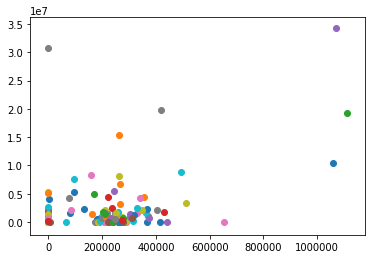

no predictions object named pred found, no clusters to plot


In [26]:
#!/usr/bin/python 

# Clustering k means

""" 
    Skeleton code for k-means clustering mini-project.
"""

import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\tools")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\final_project\\final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred




### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


What features will your clustering algorithm use?

1. salary.
2. exercised_stock_options.

Deploy k-means clustering on the financial_features data, with 2 clusters specified as a parameter. Store your cluster predictions to a list called pred, so that the Draw() command at the bottom of the script works properly. In the scatterplot that pops up, are the clusters what you expected?

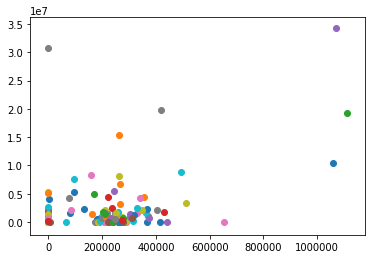

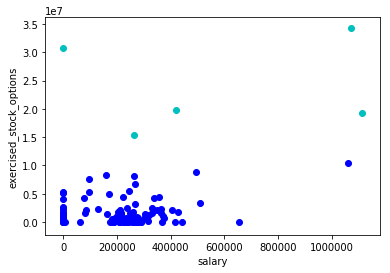

In [33]:
#!/usr/bin/python 


## clustering with 2 clusters
""" 
    Skeleton code for k-means clustering mini-project.
"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\tools")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\final_project\\final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
clf = KMeans(n_clusters = 2)
clf = clf.fit(finance_features)
pred = clf.predict(finance_features)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


> **INFO** :Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Compare the plot with the clusterings to the one you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.


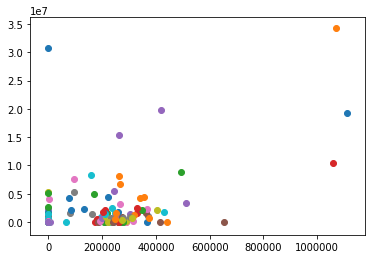

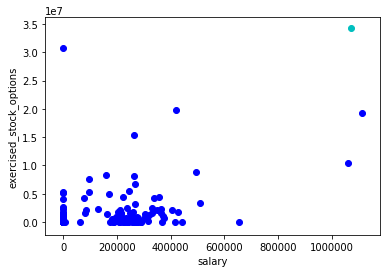

In [34]:
# clustering with 3 features

#!/usr/bin/python 


## clustering with 2 clusters
""" 
    Skeleton code for k-means clustering mini-project.
"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\tools")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\final_project\\final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"


poi  = "poi"
features_list = [poi, feature_1, feature_2,feature_3]

data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
clf = KMeans(n_clusters = 2)
clf = clf.fit(finance_features)
pred = clf.predict(finance_features)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"
